# Ejercicio perdidos en el espacio.

    El objetivo de este ejercicio es hallar la aceleración de la gravedad en 2 situaciones diferentes dejando caer una pelota. 
    
    Se miden la longitud de la caida y el tiempo que tarda en caer en los dos casos:
        ·Caso 1:
    L=1.00 m y t=0.46 s.
        ·Caso 2: 
    L=2.00 m y t=0.66 s. 
    
    Se aplican las fórmulas correspondientes para obtener los valores experimentales de g y sus errores y se comparan estos valores con los de una tabla para identificar el planeta más cercano.

In [60]:
# importamos las librerias necesarias
import pandas as pd
import faker as fk
import random as rd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sympy as sp
import seaborn as sns

In [61]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

In [48]:
# Para el apartado A
L1 = 1.00
t1 = 0.46
g_a = 2*L1 / (t1**2)
print("La aceleración de la gravedad es: ", g_a)

La aceleración de la gravedad es:  9.45179584120983


In [49]:
# Para el apartado B
L2 = 2.00
t2 = 0.66
g_b = 2*L2 / (t2**2)
print("La aceleración de la gravedad es: ", g_b)

La aceleración de la gravedad es:  9.182736455463727


In [50]:
# creamos un dataframe con los datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g_a, g_b],
    'Planeta más cercano': ['Tierra', 'Saturno'],
    '2ndo más cercano': ['Saturno', 'Tierra']},index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad,Planeta más cercano,2ndo más cercano
Escenario A,1.0,0.46,9.451796,Tierra,Saturno
Escenario B,2.0,0.66,9.182736,Saturno,Tierra


In [51]:
def calcular_error(L, t):
    L_simbolo, t_simbolo = sp.symbols('L t')
    g_calculada_simbolo = (2*L_simbolo) / (t_simbolo**2)
    
    derivada_parcial_L = sp.diff(g_calculada_simbolo, L_simbolo)
    derivada_parcial_t = sp.diff(g_calculada_simbolo, t_simbolo)
    
    error_L = 0.01
    error_t = 0.01
    
    error_g_calculada = sp.sqrt((derivada_parcial_L * error_L)**2 + (derivada_parcial_t * error_t)**2)
    
    return float(error_g_calculada.subs({L_simbolo: L, t_simbolo: t}))

    

In [52]:
fake = fk.Faker()

def generar_datos(planetas, L_objetivo, t_objetivo):
    L = round(rd.uniform(L_objetivo - 0.1, L_objetivo + 0.1), 2)
    t = round(rd.uniform(t_objetivo - 0.1, t_objetivo + 0.1), 2)
    g_calculada = round((2*L) / (t**2), 2)

    diferencia_minima = float('inf')
    planeta_mas_cercano = ''
    
    diferencia_minima_2 = float('inf')
    segundo_planeta_mas_cercano = ''

    for planeta, gravedad in planetas.items():
        diferencia = abs(gravedad - g_calculada)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            planeta_mas_cercano = planeta
    
    for planeta, gravedad in planetas.items():
        if planeta != planeta_mas_cercano:
            diferencia = abs(gravedad - g_calculada)
            if diferencia < diferencia_minima_2:
                diferencia_minima_2 = diferencia
                segundo_planeta_mas_cercano = planeta
    
    error_g_calculada = calcular_error(L, t)
    error_porcentaje = (error_g_calculada / g_calculada) * 100
    
    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        'Segundo Planeta más cercano': segundo_planeta_mas_cercano,
        'Error Gravedad (m/s^2)': error_g_calculada,
        'Error Porcentaje (%)': error_porcentaje
    }

df_a = pd.DataFrame([generar_datos(planetas, L1, t1) for _ in range(1000)])
df_a



,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,Segundo Planeta más cercano,Error Gravedad (m/s^2),Error Porcentaje (%)
0,02204ea0-faf5-4062-b639-2355ed2f2e0b,0.95,0.43,10.28,Tierra,Neptuno,0.490032,4.766852
1,90af13a8-85b8-4a2d-acbc-0e4a180ae34f,1.01,0.36,15.59,Neptuno,Tierra,0.879556,5.641797
2,18ec7754-079b-459c-850e-c8ea5b7b783f,0.96,0.50,7.68,Urano,Saturno,0.317446,4.133409
3,969f36a4-cb04-455f-83b0-ad4aa2b7d632,0.99,0.56,6.31,Urano,Marte,0.234337,3.713744
4,ca828c1b-8c78-44ee-8e79-4e94acae06c7,1.04,0.41,12.37,Neptuno,Tierra,0.615204,4.973355
...,...,...,...,...,...,...,...,...
995,9c448b0f-eb6d-4894-ba91-6aa2d3f8eab6,1.04,0.39,13.68,Neptuno,Tierra,0.713514,5.215745
996,640cbac6-8ac7-45e5-9001-64511dfcf3ce,1.01,0.46,9.55,Tierra,Saturno,0.425683,4.457414
997,9aacc56b-9505-43ca-9194-e4d4a92eb1f4,0.93,0.45,9.19,Saturno,Urano,0.420008,4.570272
998,e5f14b68-5865-4e05-ac91-28f73f49a3a7,0.99,0.47,8.96,Saturno,Urano,0.392017,4.375188


In [53]:
df_b = pd.DataFrame([generar_datos(planetas, L2, t2) for _ in range(1000)])
df_b

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,Segundo Planeta más cercano,Error Gravedad (m/s^2),Error Porcentaje (%)
0,9db1086e-3df3-4a02-849e-72bb2cbd9466,1.91,0.60,10.61,Neptuno,Tierra,0.358040,3.374553
1,a7621d9d-634b-450c-91ce-60b8bc51a04e,2.05,0.74,7.49,Urano,Saturno,0.205627,2.745351
2,538224f6-5804-4ea5-ad64-95ced3398965,2.00,0.57,12.31,Neptuno,Tierra,0.436346,3.544644
3,02dafe27-797e-418e-b4ba-26be4e7048f4,2.03,0.63,10.23,Tierra,Neptuno,0.328625,3.212369
4,b23f238c-6d30-4e36-adeb-9d6e5a982259,1.90,0.71,7.54,Urano,Saturno,0.216018,2.864959
...,...,...,...,...,...,...,...,...
995,d25426ac-de61-4233-9889-c803635555a8,2.06,0.71,8.17,Urano,Saturno,0.233618,2.859466
996,41b78961-44c2-4f75-b82b-742339443a9d,1.97,0.57,12.13,Neptuno,Tierra,0.429932,3.544367
997,24290355-1fe3-4644-b8fe-27c0479b4323,2.05,0.73,7.69,Urano,Saturno,0.214103,2.784171
998,fde30f10-bad6-4d95-9194-c7560f2f6eb5,1.98,0.65,9.37,Saturno,Tierra,0.292252,3.119023


In [54]:
def analizar_dataframe(df):
    
    print('\n --> Estadisticas descriptivas:')
    print(df.describe())
    
    print('\n --> Estos son los histogramas para cada variable:')
    df.hist(column=['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)'])
    plt.show()
    
    print('\n --> Este es el gráfico de dispersión:')
    plt.scatter(df['Longitud (m)'], df['Tiempo (s)'])
    plt.xlabel('Longitud (m)')
    plt.ylabel('Tiempo (s)')
    plt.show()

    # codificar etiquetas de planetas
    codificador_etiquetas = LabelEncoder()
    df['Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Planeta más cercano'])
    df['Segundo Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Segundo Planeta más cercano'])

    print('\n --> Estos son los datos de las correlaciones:')
    df_numeric = df.select_dtypes(include=[np.number])
    print(df_numeric.corr())
    print('\n --> Este es el mapa de calor de correlaciones:')
    sns.heatmap(df_numeric.corr(), annot=True)
    plt.show()
    
    print('\n --> Este es el gráfico de regresión lineal:')
    X = df['Longitud (m)'].values.reshape(-1, 1)
    y = df['Tiempo (s)'].values.reshape(-1, 1)

    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X, y)

    y_pred = regresion_lineal.predict(X)
    plt.scatter(X, y, color='blue') 
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Longitud (m)')
    plt.ylabel('Tiempo (s)')
    plt.show()


def contar_planetas(dataframe):
    conteo_planetas = dataframe['Planeta más cercano'].value_counts()
    
    planeta_mas_cercano_nave = conteo_planetas.idxmax()
    
    conteo_planetas_2 = dataframe['Segundo Planeta más cercano'].value_counts()
    
    segundo_planeta_mas_cercano_nave = conteo_planetas_2.idxmax()
    
    return conteo_planetas, planeta_mas_cercano_nave, conteo_planetas_2, segundo_planeta_mas_cercano_nave


 --> Estadisticas descriptivas:
       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)  Error Gravedad (m/s^2)   
count   1000.000000  1000.000000       1000.000000             1000.000000  \
mean       1.000880     0.460540          9.896500                0.461669   
std        0.056153     0.057077          2.601962                0.177731   
min        0.900000     0.360000          5.800000                0.216860   
25%        0.950000     0.410000          7.735000                0.312752   
50%        1.000000     0.460000          9.420000                0.423171   
75%        1.050000     0.510000         11.680000                0.581078   
max        1.100000     0.560000         16.980000                0.955616   

       Error Porcentaje (%)  
count           1000.000000  
mean               4.526083  
std                0.546081  
min                3.682851  
25%                4.053287  
50%                4.457414  
75%                4.971170  
max                5.665

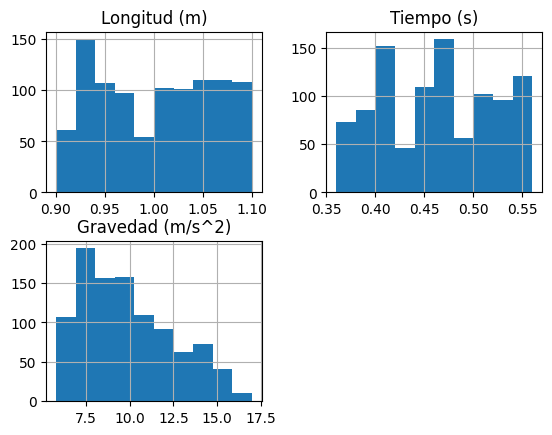


 --> Este es el gráfico de dispersión:


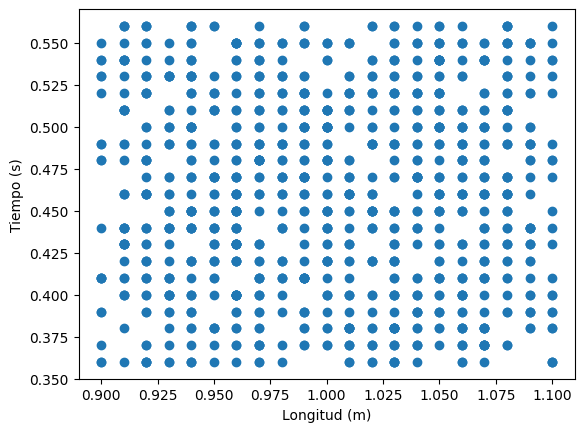


 --> Estos son los datos de las correlaciones:
                                      Longitud (m)  Tiempo (s)   
Longitud (m)                              1.000000   -0.001429  \
Tiempo (s)                               -0.001429    1.000000   
Gravedad (m/s^2)                          0.218636   -0.959096   
Error Gravedad (m/s^2)                    0.145477   -0.960874   
Error Porcentaje (%)                     -0.019452   -0.992404   
Planeta más cercano (codigo)             -0.049385    0.772894   
Segundo Planeta más cercano (codigo)      0.036970   -0.459488   

                                      Gravedad (m/s^2)   
Longitud (m)                                  0.218636  \
Tiempo (s)                                   -0.959096   
Gravedad (m/s^2)                              1.000000   
Error Gravedad (m/s^2)                        0.995649   
Error Porcentaje (%)                          0.968351   
Planeta más cercano (codigo)                 -0.778435   
Segundo Planeta m

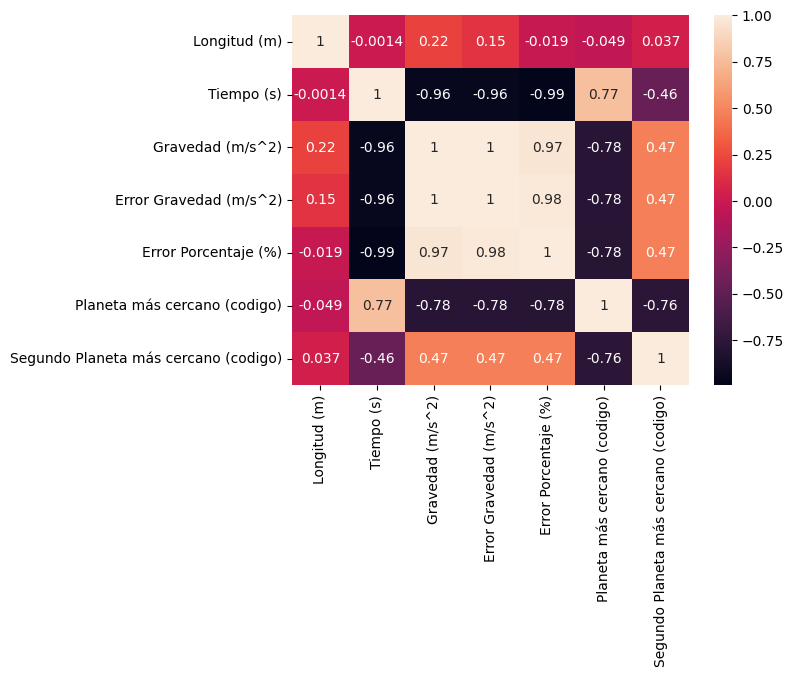


 --> Este es el gráfico de regresión lineal:


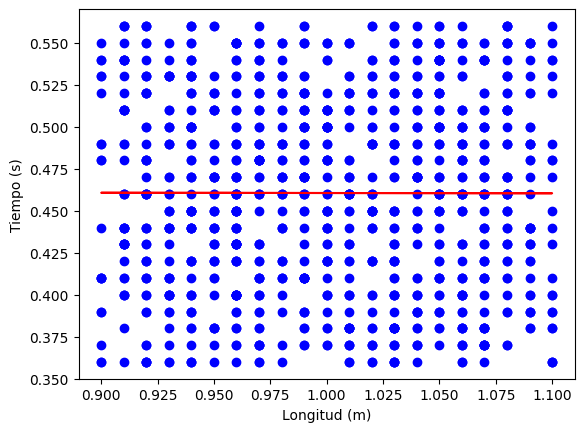

Planeta más cercano
Urano      403
Neptuno    366
Tierra     144
Saturno     68
Marte       19
Name: count, dtype: int64
El planeta donde se enceuntra la nave es : Urano porque es el planeta más cercano
El segundo planeta más cercano a la nave es: Saturno


In [55]:
analizar_dataframe(df_a)
conteo_planetas_a, planeta_mas_cercano_nave_a, conteo_planetas_2_a, segundo_planeta_mas_cercano_nave_a = contar_planetas(df_a)

print(conteo_planetas_a)
print(f'El planeta donde se enceuntra la nave es : {planeta_mas_cercano_nave_a} porque es el planeta más cercano')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercano_nave_a}')


 --> Estadisticas descriptivas:
       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)  Error Gravedad (m/s^2)   
count   1000.000000  1000.000000       1000.000000             1000.000000  \
mean       1.998920     0.660640          9.366680                0.293793   
std        0.057981     0.056898          1.647423                0.076588   
min        1.900000     0.560000          6.680000                0.179240   
25%        1.950000     0.610000          7.950000                0.227212   
50%        2.000000     0.660000          9.130000                0.279282   
75%        2.050000     0.710000         10.670000                0.350050   
max        2.100000     0.760000         13.330000                0.480292   

       Error Porcentaje (%)  
count           1000.000000  
mean               3.091279  
std                0.262132  
min                2.674654  
25%                2.860776  
50%                3.070066  
75%                3.314461  
max                3.609

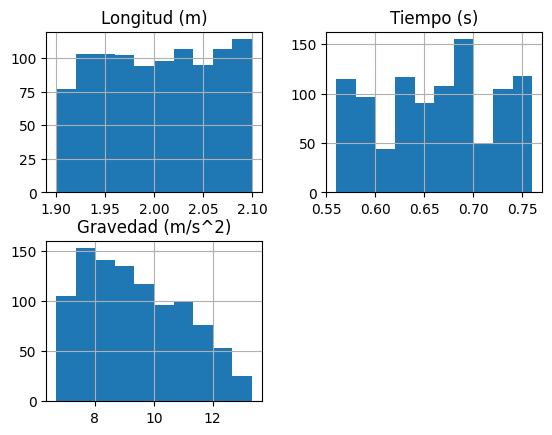


 --> Este es el gráfico de dispersión:


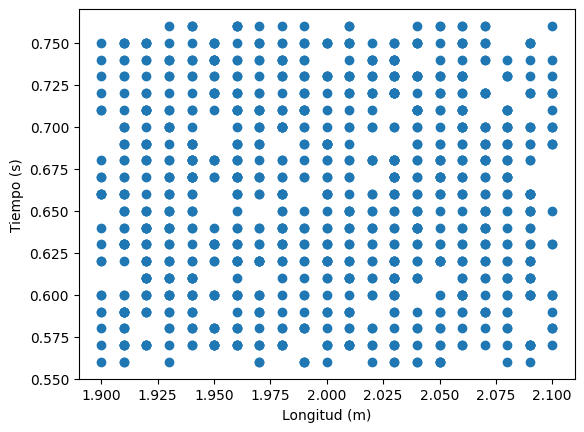


 --> Estos son los datos de las correlaciones:
                                      Longitud (m)  Tiempo (s)   
Longitud (m)                              1.000000    0.041081  \
Tiempo (s)                                0.041081    1.000000   
Gravedad (m/s^2)                          0.123514   -0.978929   
Error Gravedad (m/s^2)                    0.066502   -0.981246   
Error Porcentaje (%)                     -0.051200   -0.996683   
Planeta más cercano (codigo)             -0.088207    0.870707   
Segundo Planeta más cercano (codigo)      0.083419   -0.425921   

                                      Gravedad (m/s^2)   
Longitud (m)                                  0.123514  \
Tiempo (s)                                   -0.978929   
Gravedad (m/s^2)                              1.000000   
Error Gravedad (m/s^2)                        0.997588   
Error Porcentaje (%)                          0.983552   
Planeta más cercano (codigo)                 -0.890093   
Segundo Planeta m

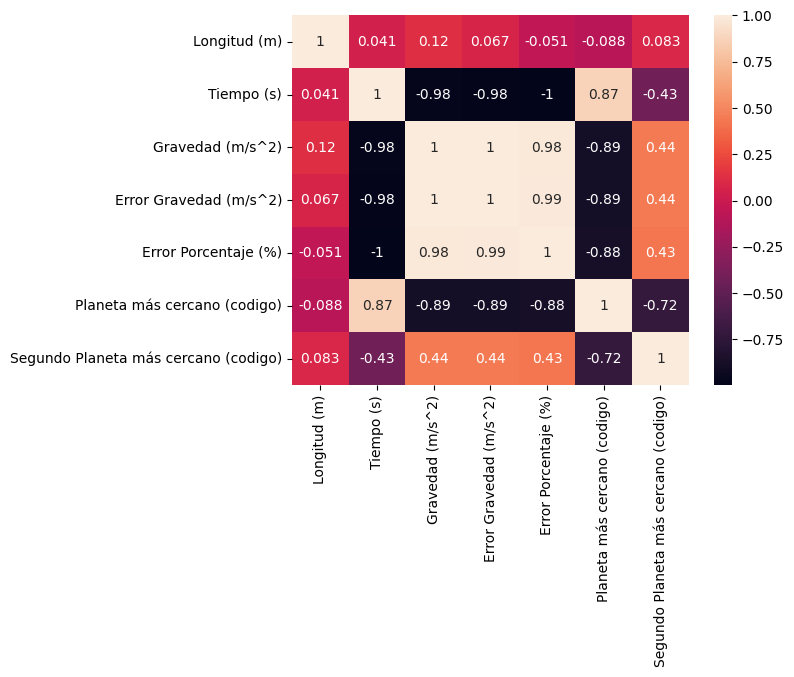


 --> Este es el gráfico de regresión lineal:


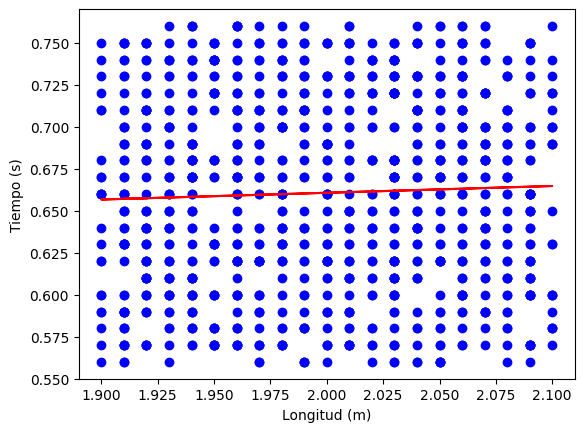

Planeta más cercano
Urano      447
Neptuno    290
Tierra     167
Saturno     96
Name: count, dtype: int64
El planeta donde se enceuntra la nave es : Urano porque es el planeta más cercano
El segundo planeta más cercano a la nave es: Saturno


In [56]:
analizar_dataframe(df_b)
conteo_planetas_b, planeta_mas_cercano_nave_b, conteo_planetas_2_b, segundo_planeta_mas_cercano_nave_b = contar_planetas(df_b)

print(conteo_planetas_b)
print(f'El planeta donde se enceuntra la nave es : {planeta_mas_cercano_nave_b} porque es el planeta más cercano')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercano_nave_b}')

In [58]:
# creamos un archivo excel con los datos
def crear_excel_exp_A():
    df = pd.DataFrame(df_a)
    df.to_excel('Datos_experimentos_A.xlsx', index=False)
    print('Archivo A creado con éxito')


def crear_excel_exp_B():
    df = pd.DataFrame(df_b)
    df.to_excel('Datos_experimentos_B.xlsx', index=False)
    print('Archivo  B creado con éxito')

crear_excel_exp_A()
crear_excel_exp_B()

Archivo A creado con éxito
Archivo  B creado con éxito
